In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style= 'darkgrid')
sns.set_palette('deep')

In [ ]:
# Cargar csv a dataframe
df = pd.read_csv('books.csv', error_bad_lines=False)

In [ ]:
# Imprimir primeras 5 filas
df.head()

In [ ]:
# Revisión de features y data types
df.info()

In [ ]:
df.duplicated().any()

In [ ]:
# Valoraciones más frecuentes
sns.kdeplot(df['average_rating'], shade=False)
plt.title('Distribución de valoraciones')
plt.xlabel('Valoración')
plt.ylabel('Frecuencia')

In [ ]:
# Idiomas más populares
df['language_code'].value_counts().head().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

In [ ]:
# Libros que ha recibido cada valoración
sns.barplot(df['average_rating'].value_counts().head(15).index, df['average_rating'].value_counts().head(15))
plt.title('Número de libros que ha recibido cada valoración\n')
plt.xlabel('Valoraciones')
plt.ylabel('Conteo')
plt.xticks(rotation=100)

In [ ]:
# Libros más populares
most_popular = df.nlargest(5, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(most_popular, most_popular.index)

In [ ]:
# Libros más reseñados
most_reviewed = df.nlargest(5, ['text_reviews_count'])
sns.barplot(most_reviewed['text_reviews_count'], most_reviewed['title'])

In [ ]:
# Top 5 de libros menores a 100 páginas
under2 = df[df['# num_pages'] <= 100]
top5 = under2.nlargest(5, ['ratings_count'])
sns.barplot(top5['ratings_count'], top5['title'], hue=top5['average_rating'])
plt.xticks(rotation=90)

In [ ]:
# Top 5 de los libros más largos
long_book = df.nlargest(5, ['# num_pages']).set_index('title')
sns.barplot(long_book['# num_pages'], long_book.index)

In [ ]:
# Autores con mejores valoraciones
plt.figure(figsize=(10, 5))
autores = df.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(autores['ratings_count'], autores.index, ci = None, hue = autores['title'])
plt.xlabel('Valoraciones totales')

In [ ]:
# Autores con más publicaciones
topAutores = df['authors'].value_counts().head()
sns.barplot(topAutores, topAutores.index)
plt.title('Autores con más publicaciones')
plt.xlabel('# de publicaciones')

In [ ]:
# Visualización de una distribución entre valoraciones y número de páginas
sns.jointplot(x = 'average_rating', y = '# num_pages', data = df)

In [ ]:
# Datos fuera del rango común (outliers)
sns.boxplot(x=df['# num_pages'])

In [37]:
# Remoción de outliers
df = df.drop(df.index[df['# num_pages'] >= 1000])

In [ ]:
# Encontrar outliers en las valoraciones
sns.boxplot(x=df['ratings_count'])

In [39]:
# Remoción de outliers
df = df.drop(df.index[df['ratings_count'] >= 1000000])

In [40]:
df = df.drop(df.index[df['text_reviews_count'] >= 20000])

In [42]:
le = preprocessing.LabelEncoder()
df['title'] = le.fit_transform(df['title'])

In [43]:
df['authors'] = le.fit_transform(df['authors'])

In [44]:
enc_lang = pd.get_dummies(df['language_code'])
df = pd.concat([df, enc_lang], axis=1)

In [46]:
# Dividir datos en atributos y etiquetas
X = df.drop(['average_rating', 'language_code', 'isbn'], axis=1)
y = df['average_rating']

In [47]:
# Dividir el set para entrenamiento y para validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [48]:
LR = LinearRegression()
LR.fit(X_train, y_train)
predict = LR.predict(X_test)

In [54]:
prd = pd.DataFrame({'Actual': y_test.tolist(), 'Predicciones': predict.tolist()}).head(25)
prd.head(10)

,Actual,Predicciones
0,3.89,3.906723
1,3.68,3.852341
2,4.24,3.971296
3,4.16,3.959876
4,3.95,3.844046
5,4.18,3.963695
6,3.30,3.910567
7,4.08,3.872314
8,3.61,3.905194
9,3.93,3.879550


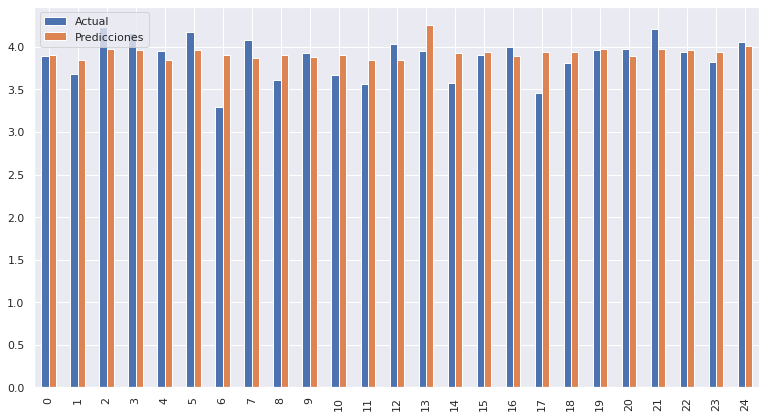

In [55]:
prd.plot(kind='bar', figsize=(13, 7))

In [56]:
print('EAM:', metrics.mean_absolute_error(y_test, predict))
print('ECM:', metrics.mean_squared_error(y_test, predict))

EAM: 0.2233009129125104
ECM: 0.09825688679850104
